## Essential GIS Raster Operations

In [1]:
import rasterio
import rasterio.plot
import matplotlib.pyplot as plt
import numpy as np

## 1- Reading and Exploring raster data

### Openning a single-band DEM image using

In [2]:
raster_path = ('https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif')
src = rasterio.open(raster_path)
print(src)

<open DatasetReader name='https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif' mode='r'>


### Retrieving and printing the raster metadata

#### Raster Metadata

In [3]:
src.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': None,
 'width': 4269,
 'height': 3113,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]'),
 'transform': Affine(90.0, 0.0, -13442488.3428,
        0.0, -89.99579177642138, 4668371.5775)}

#### Cordinate Reference System (SRC)

In [4]:
src.crs

CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]')

#### Spatial Resolution

##### the size of one pixel in real-world units

In [5]:
src.res

(90.0, 89.99579177642138)

#### Bounds

##### Represented by the coordinates of the edges of the raster (left, bottom, right, top).

In [6]:
src.bounds

BoundingBox(left=-13442488.3428, bottom=4388214.6777, right=-13058278.3428, top=4668371.5775)

#### Number of bands

In [7]:
src.count

1

#### Data Types

##### the data type of each pixel value 

In [8]:
src.dtypes

('int16',)

#### Raster Dimensions

##### Width:

In [9]:
src.width

4269

##### Heigth

In [10]:
src.height

3113

In [11]:
src.shape

(3113, 4269)

## 2.- Visualizing and Manipulating Raster Bands

### Visualizing the single-band DEM using a custom colormap.

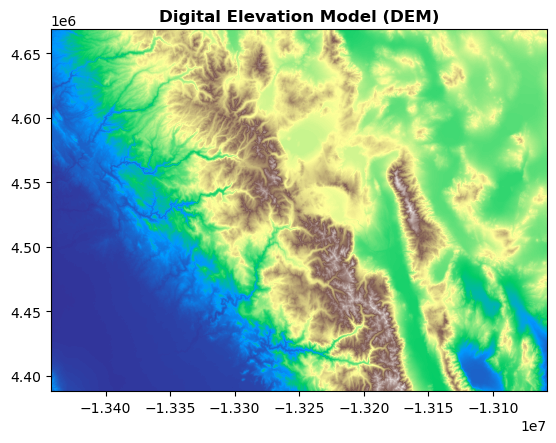

<Axes: title={'center': 'Digital Elevation Model (DEM)'}>

In [12]:
rasterio.plot.show(src, cmap="terrain", title="Digital Elevation Model (DEM)")

### Opening a multispectral image and visualizing the first band 

In [13]:
multi_raster_path =  "https://github.com/opengeos/datasets/releases/download/raster/LC09_039035_20240708_90m.tif"
multi_src = rasterio.open(multi_raster_path)

print(multi_src)

<open DatasetReader name='https://github.com/opengeos/datasets/releases/download/raster/LC09_039035_20240708_90m.tif' mode='r'>


#### Number of bands

In [14]:
multi_src.count

7

#### Visualizing the first band

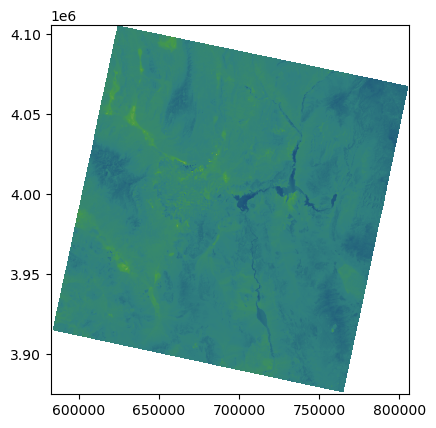

<Axes: >

In [15]:
rasterio.plot.show((multi_src,1), cmap="gist_earth")

### Combining multiple bands from the multispectral image (e.g., Red, Green, and Blue) and stack them to create an RGB composite image.

In [16]:
#getting the differents bands
blue_band = multi_src.read(2)
green_band = multi_src.read(3)
red_band = multi_src.read(4)

In [17]:
rgb_shape = (multi_src.height,multi_src.width,3)
rgb_shape

(2563, 2485, 3)

In [18]:
# creating the rgb image
rgb_image = np.zeros(rgb_shape)
rgb_image[:,:,0] = red_band
rgb_image[:,:,1] = green_band
rgb_image[:,:,2] = blue_band

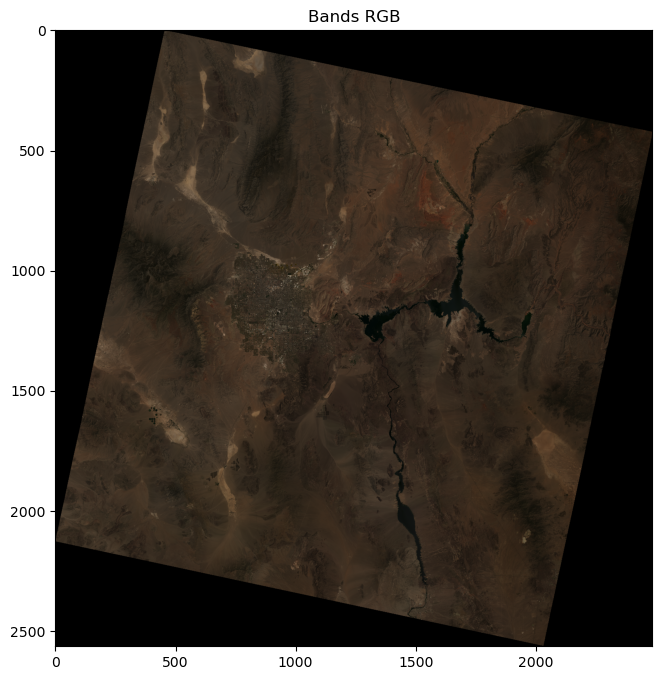

In [19]:
plt.figure(figsize=(8,8))
plt.imshow(rgb_image.clip(0, 1))
plt.title("Bands RGB")
plt.show()

## 3.- Raster Clipping with Array Indexing

### Opening the multiespectral image and clipping it

In [20]:
multi_raster_path =  "https://github.com/opengeos/datasets/releases/download/raster/LC09_039035_20240708_90m.tif"
multi_src = rasterio.open(multi_raster_path)

In [21]:
data = multi_src.read()

In [22]:
data.shape

(7, 2563, 2485)

In [23]:
def clip_image(start_row, row_length, start_col, col_length, data):
    total_rows = data.shape[1]
    total_cols = data.shape[2]

    if(start_row < 0 or start_row < 0):
        print('the Start row or col must be positive')
        return
    if(row_length < 0 or col_length < 0):
        print('the row or col length must be positive')
        return
    if(start_row >= total_rows or start_col >= total_cols):
        print('The start row or col must be inside the data dimensions')
        return
    if(start_row+row_length >= total_rows or start_col+col_length >= total_cols):
        print('The row or col length must be inside the data dimensions')
    
    subset = data[:, start_row: start_row+row_length, start_col: start_col + col_length].clip(0, 1)
    rgb_clipped_image = np.zeros((subset.shape[1],subset.shape[2],3))
    #inserting red band
    rgb_clipped_image[:,:,0] = subset[4,:,:]
    #inserting blue band
    rgb_clipped_image[:,:,1] = subset[3,:,:]
    #inserting green band
    rgb_clipped_image[:,:,2] = subset[2,:,:]
    return rgb_clipped_image

In [24]:
clipped_image = clip_image(900,500,700,500,data)

## Visualizing the clipped portion of the image 


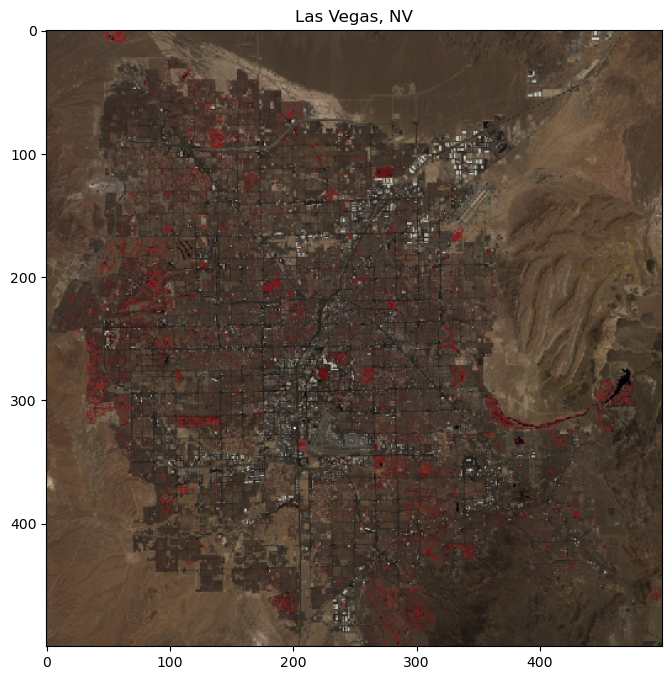

In [25]:
# Plot the stacked array
plt.figure(figsize=(8, 8))
plt.imshow(clipped_image)
plt.title("Las Vegas, NV")
plt.show()

### Saving the clipped raster subset

In [26]:
with rasterio.open(raster_path) as src:
    profile = src.profile
print(profile)

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 4269, 'height': 3113, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]'), 'transform': Affine(90.0, 0.0, -13442488.3428,
       0.0, -89.99579177642138, 4668371.5775), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


In [27]:
profile.update(dtype=rasterio.float32, count=clipped_image.shape[2], compress="lzw", height=clipped_image.shape[0],
    width=clipped_image.shape[1])

In [28]:
clipped_image.shape

(500, 500, 3)

In [29]:
output_raster_path = "clipped_multispectral.tif"
write_image = np.zeros((clipped_image.shape[2], clipped_image.shape[0], clipped_image.shape[1]))
write_image[0,:,:] = clipped_image[:,:,0]
write_image[1,:,:] = clipped_image[:,:,1]
write_image[2,:,:] = clipped_image[:,:,2]
with rasterio.open(output_raster_path, "w", **profile) as dst:
    dst.write(write_image)
print(f"Raster data has been written to {output_raster_path}")

Raster data has been written to clipped_multispectral.tif


## 4.- Calculating NDWI

### Openning the multispectral image and extracting the Green and Near-Infrared (NIR) bands

In [30]:
#Openning multi-spectral image
multi_raster_path =  "https://github.com/opengeos/datasets/releases/download/raster/LC09_039035_20240708_90m.tif"
multi_src = rasterio.open(multi_raster_path)

In [31]:
# Extracting Green Band (Number 3)
green_band = multi_src.read(3, masked=True).astype('float32') # In order to avoid null values

In [32]:
# Extracting Nir Band (Number 5)
nir_band = multi_src.read(5, masked=True).astype('float32')


### Calculating the Normalized Difference Water Index NDWI

In [33]:
#NDWI = (Green - NIR) / (Green + NIR)
denominator = green_band + nir_band
numerator = green_band - nir_band

ndwi = np.where(denominator == 0, 0, numerator / denominator)


In [34]:
ndwi = ndwi.clip(-1, 1)

### Visualizing the NDWI result using

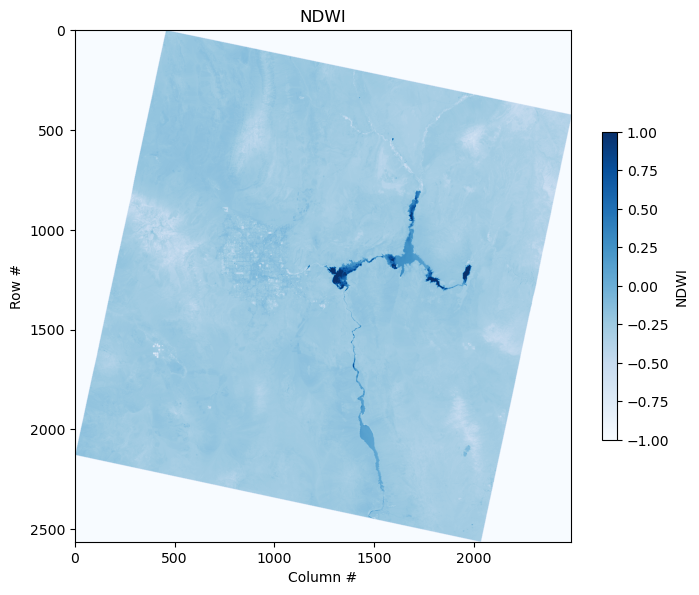

In [35]:
plt.figure(figsize=(8,8))
plt.imshow(ndwi, cmap="Blues", vmin=-1, vmax=1)
plt.colorbar(label='NDWI', shrink=0.5)
plt.title('NDWI')
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()

### Saving the resulting NDWI image

In [36]:
with rasterio.open(raster_path) as src:
    ndwi_profile = src.profile
print(ndwi_profile)

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 4269, 'height': 3113, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]'), 'transform': Affine(90.0, 0.0, -13442488.3428,
       0.0, -89.99579177642138, 4668371.5775), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


In [37]:
ndwi_profile.update(dtype=rasterio.float32, count = 1, compress = "lwz")

In [38]:
output_ndwi_path = 'ndwi.tif'

with rasterio.open(output_ndwi_path, "w", **ndwi_profile) as dst:
    dst.write(ndwi,1)
print(f"Raster data has been written to {output_ndwi_path}")

Raster data has been written to ndwi.tif


## 5.- Reprojecting Raster Data

### Reprojecting the single-band DEM raster from inst original CRS to EPSG:4326

In [39]:
from rasterio.warp import calculate_default_transform, reproject, Resampling

dem_raster_path = "https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif"
dst_crs = "EPSG:4326"

with rasterio.open(dem_raster_path) as dem_src:
    dts_transfrom, dst_width, dst_height = calculate_default_transform(
        dem_src.crs, dst_crs, dem_src.width, dem_src.height,*dem_src.bounds
    )
    dem_reprojected =np.zeros((dst_height, dst_width))
    reproject(
        source = dem_src.read(1), 
        destination = dem_reprojected, 
        src_transform = dem_src.transform,
        src_crs = dem_src.crs,
        dst_transform = dts_transfrom,
        dst_crs = dst_crs,
        resampling=Resampling.nearest,
    )
    

### Saving the reprojected raster to a new GeoTIFF file 

In [40]:
dst_dem_raster_path = 'reprojected_dem.tif'
with rasterio.open(dem_raster_path) as dem_src:
    dem_profile = dem_src.profile

In [41]:
# updating the profile
dem_profile.update(crs = dst_crs, transform = dts_transfrom, width = dst_width, height = dst_height)

In [42]:
with rasterio.open(dst_dem_raster_path,"w", **profile) as dem_dst:
    dem_dst.write(dem_reprojected,1)
print(f"Reprojected raster saved at {dst_dem_raster_path}")


Reprojected raster saved at reprojected_dem.tif


### Visualizing both the original and reprojected DEM

In [43]:
#Reading original
dem_raster_path = "https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif"
dem_src = rasterio.open(dem_raster_path)

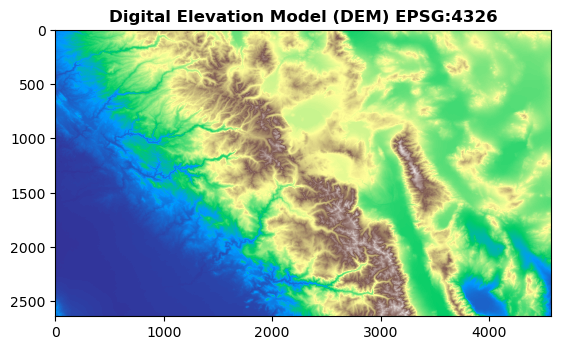

<Axes: title={'center': 'Digital Elevation Model (DEM) EPSG:4326'}>

In [44]:
rasterio.plot.show(dem_reprojected, cmap="terrain", title="Digital Elevation Model (DEM) EPSG:4326")

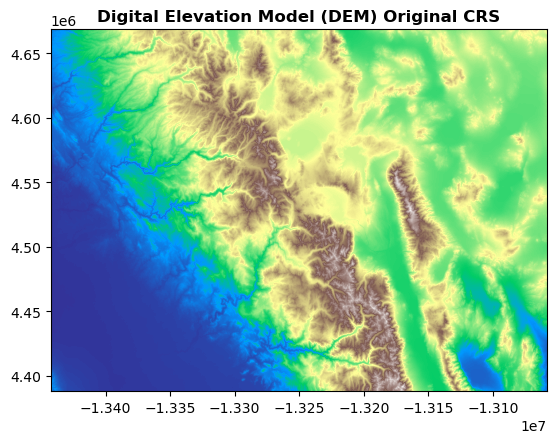

<Axes: title={'center': 'Digital Elevation Model (DEM) Original CRS'}>

In [45]:
rasterio.plot.show(dem_src, cmap="terrain", title="Digital Elevation Model (DEM) Original CRS")

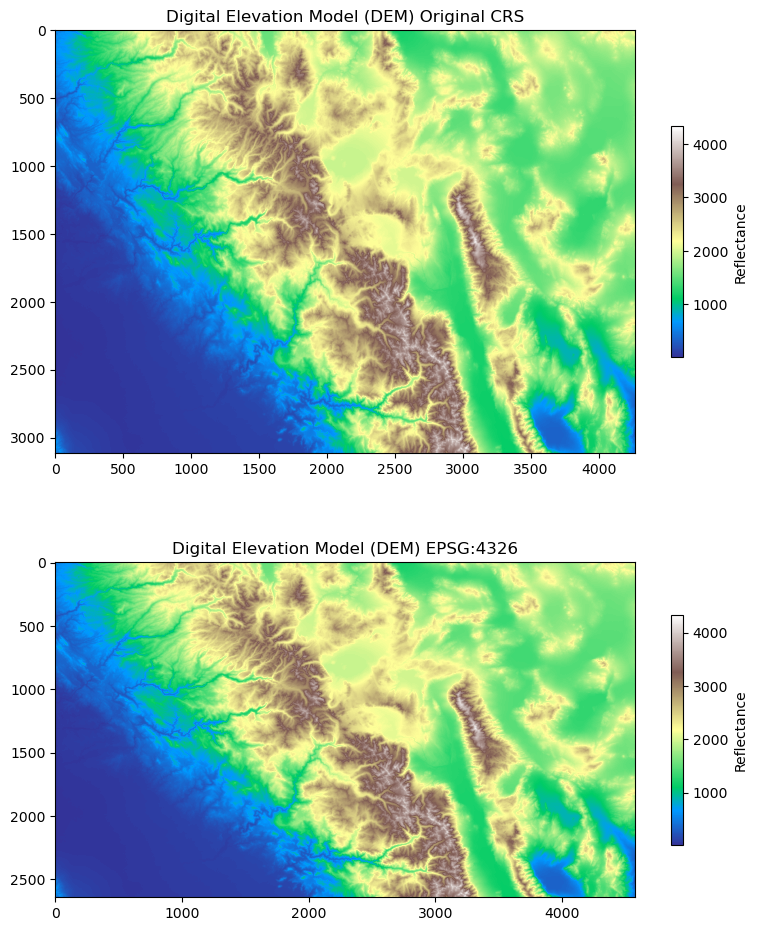

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=1 , figsize=(8,10))
axes = axes.flatten() 
ax1 = axes[0]
im = ax1.imshow(dem_src.read(1), cmap="terrain")
ax1.set_title("Digital Elevation Model (DEM) Original CRS")
fig.colorbar(im, ax=ax1,label="Reflectance", shrink=0.5)
ax2 = axes[1]
im = ax2.imshow(dem_reprojected, cmap="terrain")
ax2.set_title("Digital Elevation Model (DEM) EPSG:4326")
fig.colorbar(im, ax=ax2,label="Reflectance", shrink=0.5)
plt.tight_layout()
plt.show()